In [1]:
import gym

In [2]:
# to install gym_act:
# git clone https://github.com/PhilippeW83440/CS234_Project.git
# cd gym-act
# pip install -e .
import gym_act

# source code is in https://github.com/PhilippeW83440/CS234_Project/blob/master/gym-act/gym_act/envs/act_env.py
# or if you did: git clone https://github.com/PhilippeW83440/CS234_Project.git
# in CS234_Project/gym-act/gym_act/envs/act_env.py

# By default: ACT with 2 cars with CV (Constant Velocity) driver model
#env = gym.make("Act-v0")

# ACT with 10 cars with CV (Constant Velocity) driver model
env = gym.make("Act10cv-v0")

[2019-03-14 10:59:52,175] Making new env: Act10cv-v0


ACT (Anti Collision Tests) with 10 cars using cv driver model
SEED 10971597703429474133


/home/philippew/anaconda3/envs/py36/lib/python3.6/site-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
action = 0
obs, reward, done, info = env.step(action)
print("reward {}".format(reward))
img = env.render()

reward -1


In [4]:
import matplotlib.pyplot as plt
import cv2

def show_img(img):
    plt.imshow(img)
    plt.show()
    
def  resize_images(images, f=3):
    big_images = []
    for img in images:
        big_images.append(cv2.resize(img, None, fx=f, fy=f))
    return big_images

plt.rcParams["figure.figsize"]=10,10

In [5]:
import numpy as np

max_episodes = 15
max_steps = 120

# METRICS
metric_success = 0 # EFFICIENCY
metric_steps_to_goal = [] # SAFETY
metric_hardbrake = [] # COMFORT
metric_cumulated_reward = []

for episode in range(max_episodes):
    print("====> Start episode {}".format(episode))
    env.reset()
    cumulated_reward = 0
    images = []
    
    hardbrake = 0    
    for n in range(max_steps):
        action = 0
        #action = np.random.randint(low=-2,high=3) 
        if action <= -2:
            hardbrake += 1
        state, reward, done, info = env.step(action)
        env.penalty(state)
        cumulated_reward += reward
        print("Step {}: action={} reward={} done={}".format(n, action, reward, done)) # PHW DEBUG
        img = env.render()
        images.append(img)
        if done is True:
            if info == "success":
                metric_success += 1
                metric_steps_to_goal.append(n)
                metric_hardbrake.append(hardbrake)
                metric_cumulated_reward.append(cumulated_reward)
            print("End of episode {} with cumulated_reward {}".format(episode, cumulated_reward))
            break

print("METRICS: REWARD AvgCumulatedReward = {}".format(np.mean(metric_cumulated_reward)))
print("METRICS: SAFETY %collisions = {}, COMFORT MeanHardBrake = {}, EFFICIENCY MeanStepsToGoal = {}".format(1-metric_success/max_episodes, np.mean(metric_hardbrake), np.mean(metric_steps_to_goal)))

====> Start episode 0
Step 0: action=0 reward=-1 done=False
Step 1: action=0 reward=-1 done=False
Step 2: action=0 reward=-1 done=False
Step 3: action=0 reward=-1 done=False
Step 4: action=0 reward=-1 done=False
Step 5: action=0 reward=-1 done=False
Step 6: action=0 reward=-1 done=False
Step 7: action=0 reward=-1 done=False
Step 8: action=0 reward=-1 done=False
Step 9: action=0 reward=-1 done=False
Step 10: action=0 reward=-1 done=False
Step 11: action=0 reward=-1 done=False
Step 12: action=0 reward=-1 done=False
Step 13: action=0 reward=-1 done=False
Step 14: action=0 reward=-1 done=False
Step 15: action=0 reward=-1 done=False
Step 16: action=0 reward=-1 done=False
Step 17: action=0 reward=-1001 done=True
End of episode 0 with cumulated_reward -1018
====> Start episode 1
Step 0: action=0 reward=-1 done=False
Step 1: action=0 reward=-1 done=False
Step 2: action=0 reward=-1 done=False
Step 3: action=0 reward=-1 done=False
Step 4: action=0 reward=-1 done=False
Step 5: action=0 reward=-1 

In [6]:
print(metric_hardbrake)
print(metric_success)
print(metric_steps_to_goal)
print(max_episodes)

[0]
1
[49]
15


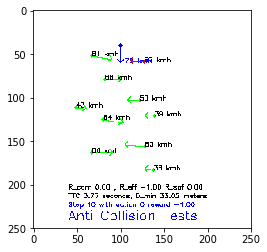

In [7]:
show_img(images[9])

# Visualization

In [8]:
import imageio
from IPython.core.display import HTML

In [9]:
imageio.mimsave('img/visu.gif', images, duration=0.2)
HTML("""<img src="img/visu.gif"/>""")

In [10]:
big_images = resize_images(images, f=2)
imageio.mimsave('img/visu2.gif', big_images, duration=0.2)
HTML("""<img src="img/visu2.gif"/>""")